In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def niceDisplay14(affichages,titres=None):
    """ list[Array]*list[str] -> NoneType
        display from 1 up to 4 images or vectors with optionnal titles
        2D arrays are displayed as image with imshow()
        1D arrays are displayed as curve with plot()
    """
    
    if not type(affichages) == type([]):
        affichages = [affichages]
        
    if titres is None:
        titres = ['',]*len(affichages)
        
    if not type(titres) == type([]):
        titres = [titres]
    
    nb_affichages = len(affichages)
    if nb_affichages >4 or nb_affichages < 1 :
        raise ValueError('niceDisplay_14 : affichage should be a list of length 1 up to 4')
        
    if nb_affichages != len(titres):
        raise ValueError('niceDisplay_14 : titres must have same length than affichage')
        
    courbes = False
    for i in range(0,nb_affichages):
        s = plt.subplot(101+10*nb_affichages+i)
        s.set_title(titres[i])
            # on affiche une image
        s.imshow(affichages[i], cmap = 'gray')

    agrandissement_h = nb_affichages
    agrandissement_v = nb_affichages*2 if courbes else nb_affichages
    params = plt.gcf()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*agrandissement_v, plSize[1]*agrandissement_h) )
    plt.show()

    

def imshow(I, title=None, size=500, axis=False):
    """ display an image, with title, size, and axis """
    plt.figure(figsize=(size//80, size//80))
    plt.imshow(I)
    if not axis: plt.axis('off')
    if title: plt.title(title)
    plt.show()
    

In [3]:
def entropy_bw(I):
    #p = np.array([(I == x).sum() for x in range(256)]) #calcul d'histogramme
    p, _ = np.histogram(I, bins = 256)
    p = p/p.sum() #normalisation de l'histogramme
    #ent_I = -(np.sum((p+eps)*np.log2(p+eps))) #calcul de l'entropie
    ent_I = -(np.sum(p[p>0]*np.log2(p[p>0]))) #calcul de l'entropie
    return ent_I

def entropy_color(I, k):
    I = I/k #Réduire la dynamique de l'image en la divisant par k
    I = I.astype(int) # Ne garder que la partie entière des valeurs
    p_values = int(256/k)
    H_3d = np.zeros((p_values,p_values,p_values)) # Initialiser l'histogramme 3D par la nouvelle dynamique
    
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            x = I[i,j] # x est un pixel qui a trois valeurs R G B
            H_3d[x[0],x[1],x[2]] += 1 #on va incrémenter le nombre des valeurs R G B sur l'histogramme3D
            
    p = H_3d/H_3d.sum() # On normalise l'histogramme
    
    #entropy = -(np.sum((p+eps)*np.log2(p+eps))) #calcul de l'entropie
    entropy = -(np.sum(p[p>0]*np.log2(p[p>0]))) #calcul de l'entropie

    return entropy

In [4]:
def CalculateArtistEntropy(n, directory, bw = None):
    entropies = np.zeros(n)
    if bw == None:
        for i in range(0,n,2):
            I = np.array(Image.open(directory + str(i+1) + '.jpg'))
            I2 = np.array(Image.open(directory + str(i+2) + '.jpg'))
            e1 = entropy_color(I,1)
            e2 = entropy_color(I2,1)
            title1 = 'Entropy = ' + str(np.round(e1,2))
            title2 = 'Entropy = ' + str(np.round(e2,2))
            niceDisplay14([I, I2],
                [title1, title2])
            entropies[i] = e1
            entropies[i+1] = e2
            
                
    else: 
        for i in range(0,n,2):
            I = np.array(Image.open(directory + str(i+1) + '.jpg'))
            I2 = np.array(Image.open(directory + str(i+2) + '.jpg'))
            e1 = entropy_bw(I)
            e2 = entropy_bw(I2)
            title1 = 'Entropy_BW = ' + str(np.round(e1,2))
            title2 = 'Entropy_BW = ' + str(np.round(e2,2))
            niceDisplay14([I, I2],
                [title1, title2])
            entropies[i] = e1
            entropies[i+1] = e2
            
            
    return entropies

# Doisneau

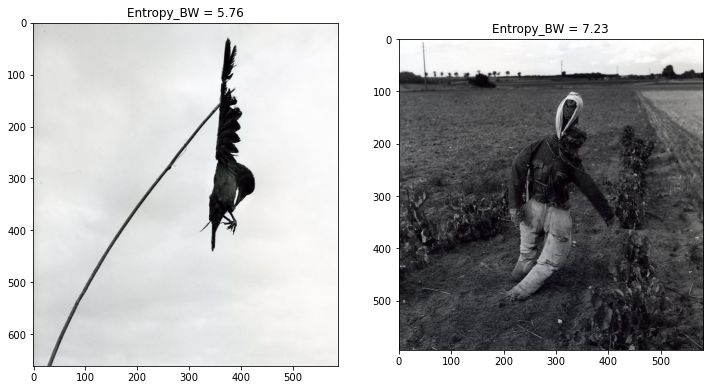

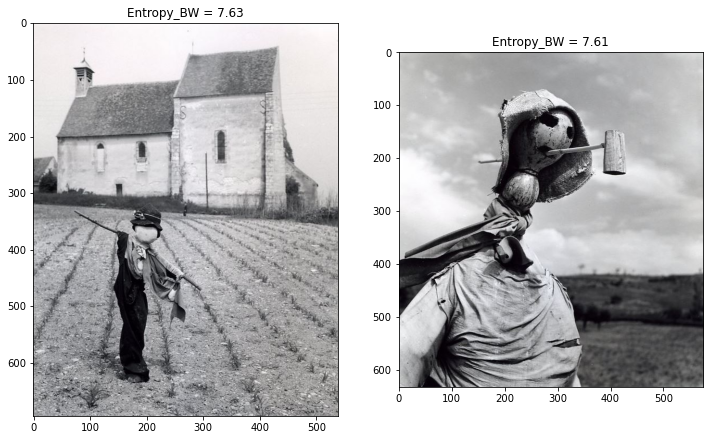

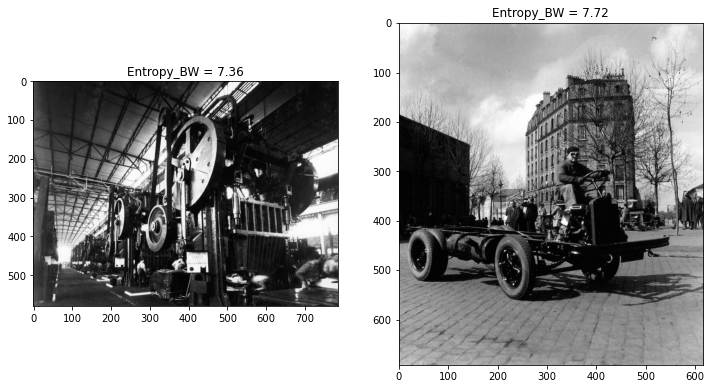

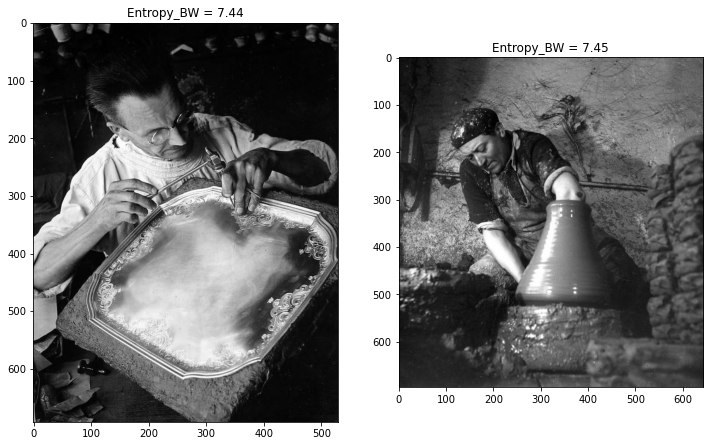

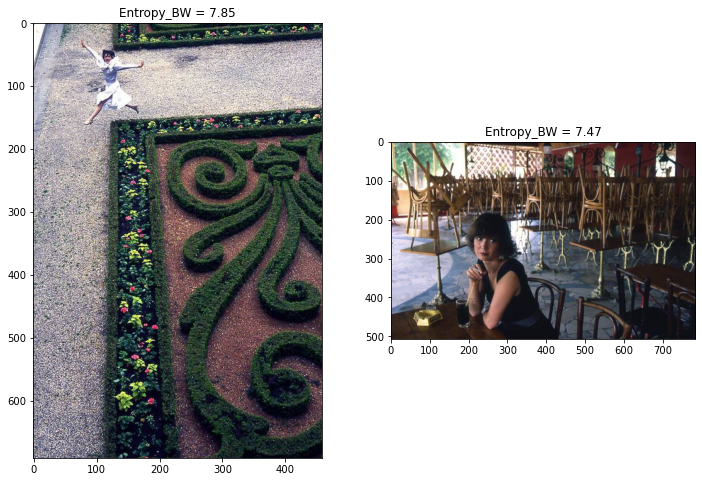

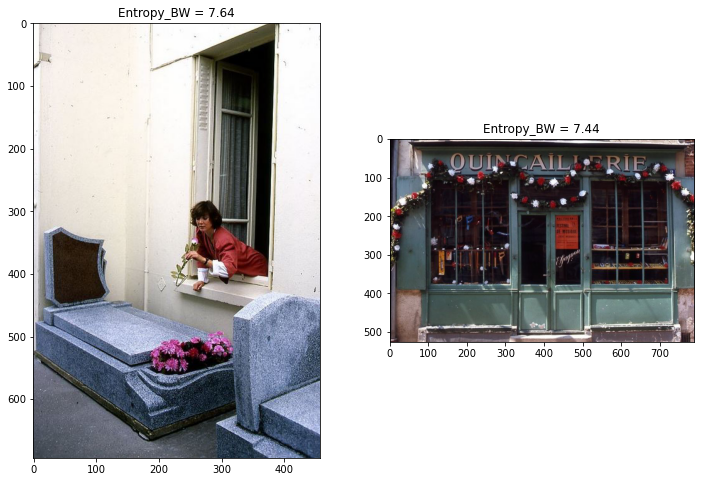

la moyenne des entropies BW des photos de Doisneau : 7.38


In [5]:
n = 12
entropies = CalculateArtistEntropy(n, 'Artists/Doisneau/', bw = True)
mean = np.round(entropies.mean(), 2)
print('la moyenne des entropies BW des photos de Doisneau : ' + str(mean))

# Angelika Kollin

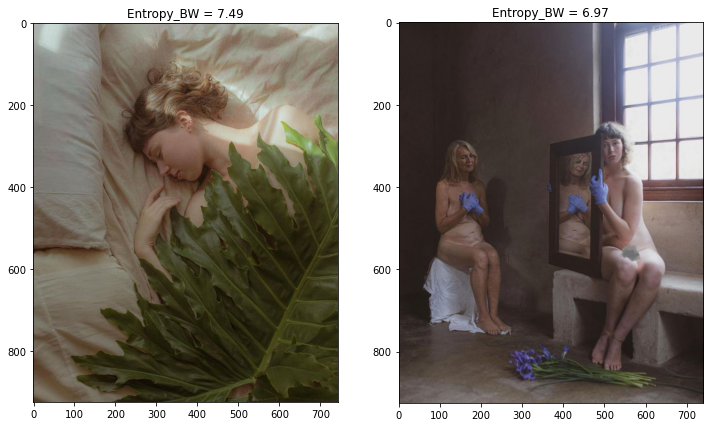

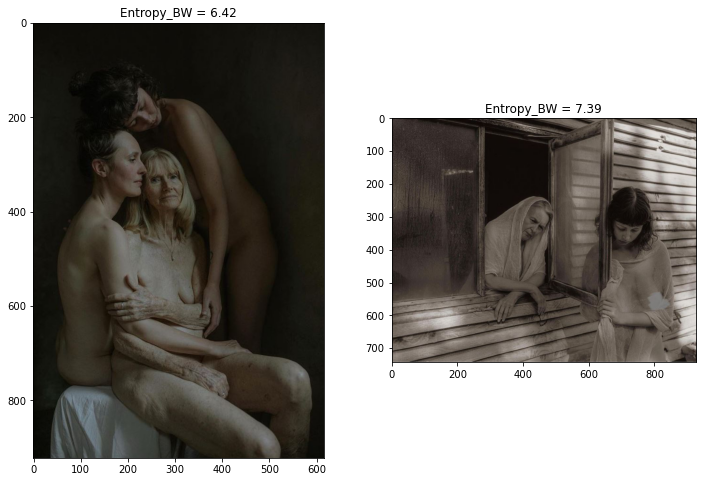

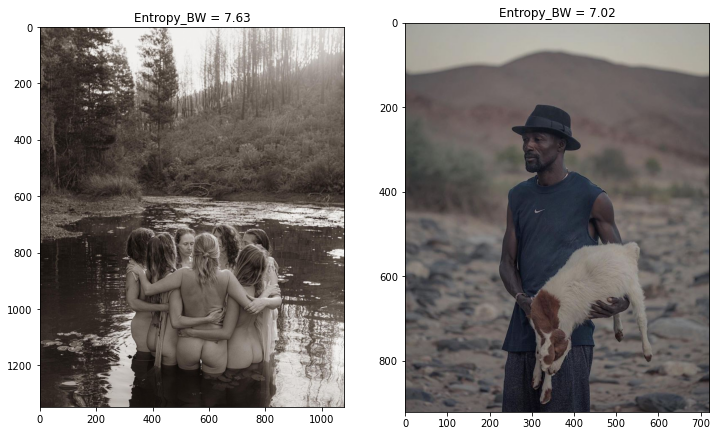

la moyenne des entropies BW des photos de Angelika Kollika : 7.15


In [6]:
n = 6
entropies = CalculateArtistEntropy(n, 'Artists/Angelika Kollin/', bw = True)
mean = np.round(entropies.mean(), 2)
print('la moyenne des entropies BW des photos de Angelika Kollika : ' + str(mean))

# Dorothea Lange

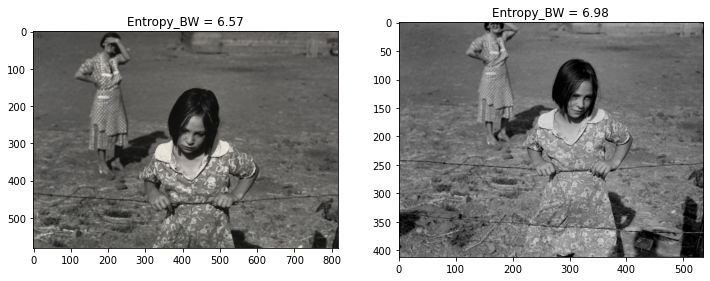

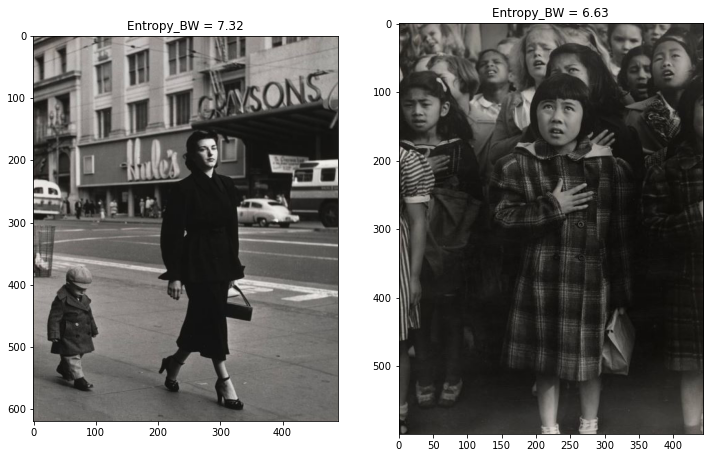

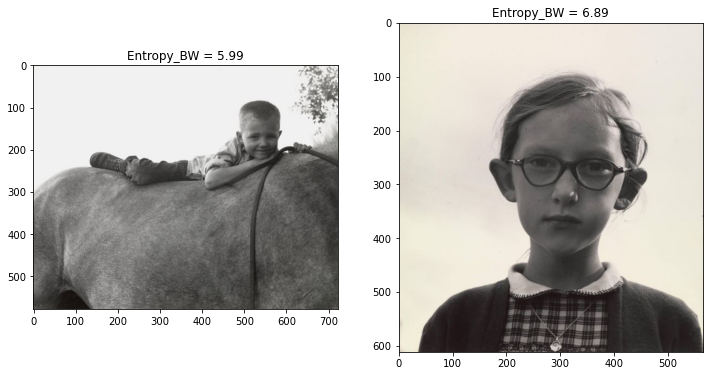

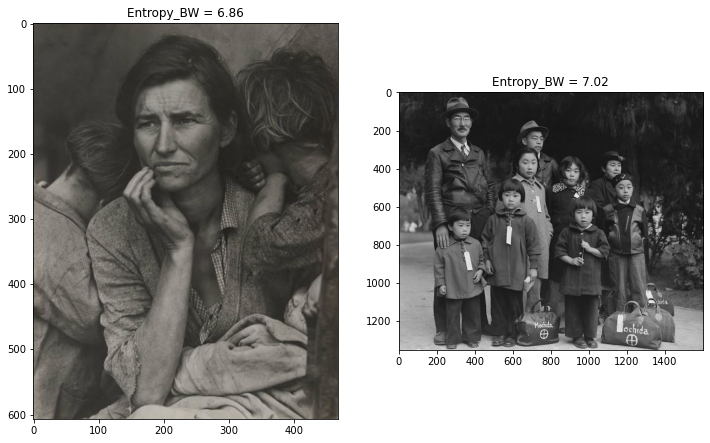

la moyenne des entropies des photos de Dorothea Lange : 6.78


In [7]:
n = 8
entropies = CalculateArtistEntropy(n, 'Artists/Dorothea Lange/', bw = True)
mean = np.round(entropies.mean(), 2)
print('la moyenne des entropies des photos de Dorothea Lange : ' + str(mean))

Des images en niveaux de gris bien détaillées donc Entropie = proche de 8

# Henri Cartier-Bresson

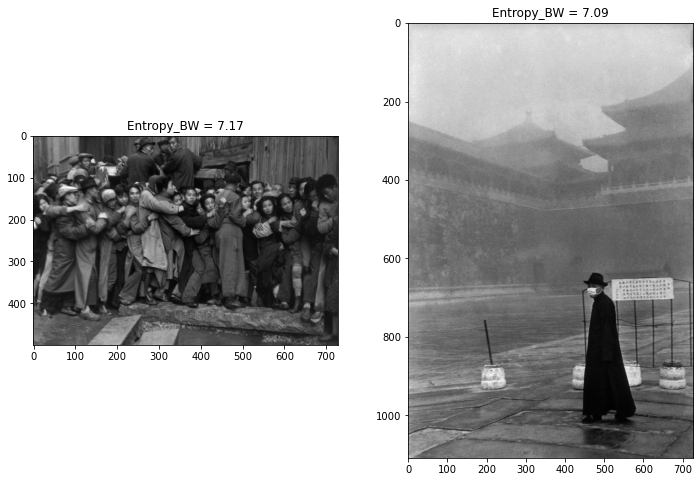

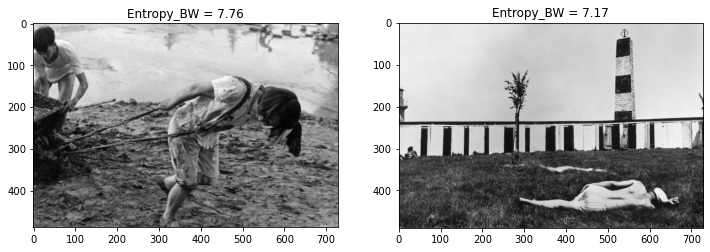

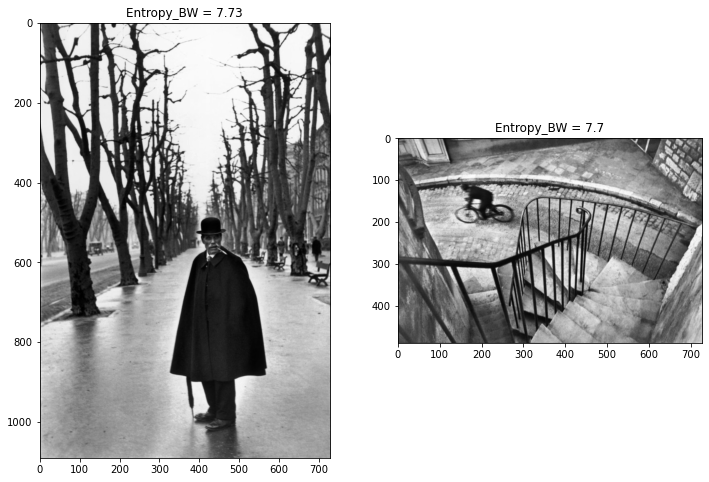

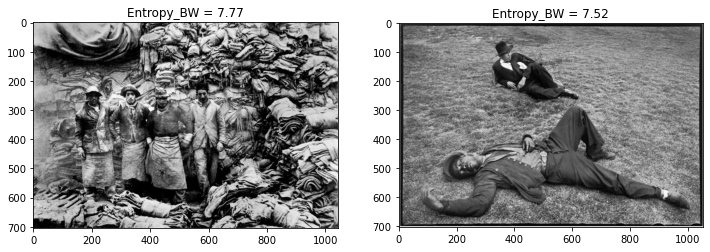

la moyenne des entropies des photos de Henri Cartier-Bresson : 7.49


In [8]:
n = 8
entropies = CalculateArtistEntropy(n, 'Artists/Cartier Bresson/', bw = True)
mean = np.round(entropies.mean(), 2)
print('la moyenne des entropies des photos de Henri Cartier-Bresson : ' + str(mean))

Même chose pour les photos de Cartier-Bresson, des images en niveaux de gris bien détaillées donc Entropie = proche de 8

# Images Moches

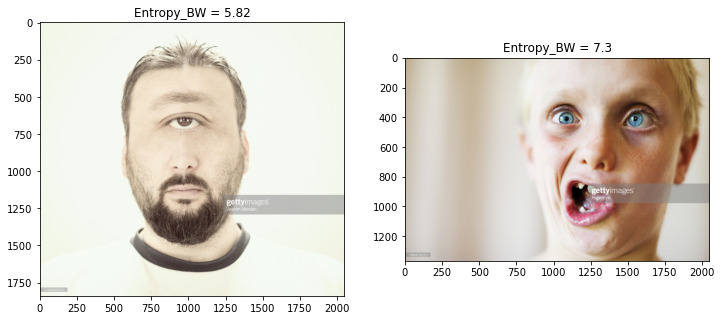

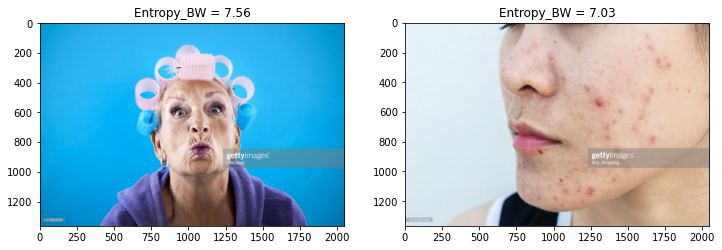

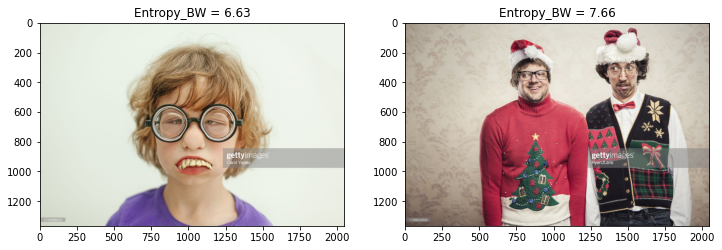

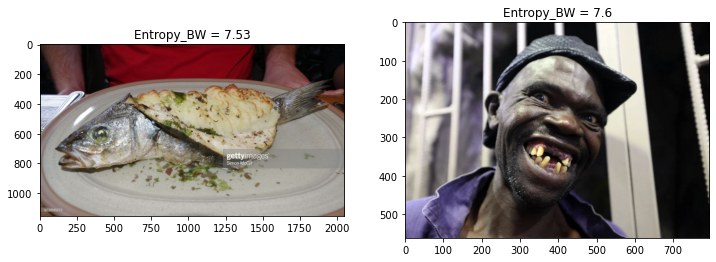

la moyenne des entropies BW des photos moches : 7.14


In [20]:
n = 8
entropies = CalculateArtistEntropy(n, 'Ugly Pictures/', bw = True)
mean = np.round(entropies.mean(), 2)
print('la moyenne des entropies BW des photos moches : ' + str(mean))

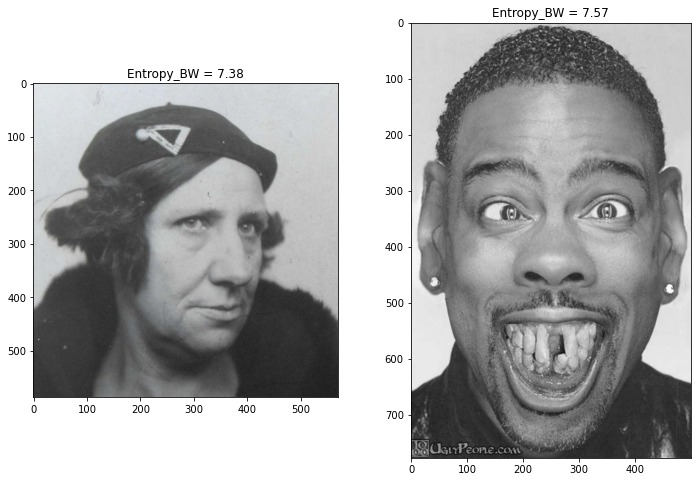

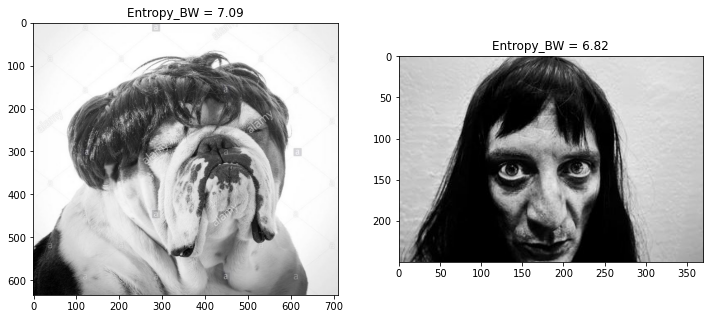

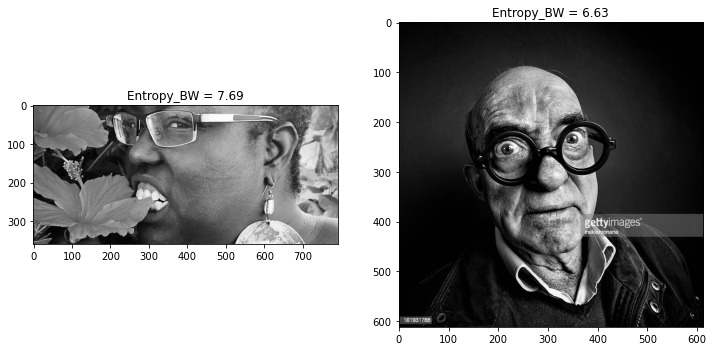

la moyenne des entropies BW des photos moches : 7.2


In [9]:
n = 6
entropies = CalculateArtistEntropy(n, 'Ugly Pictures BW/', bw = True)
mean = np.round(entropies.mean(), 2)
print('la moyenne des entropies BW des photos moches : ' + str(mean))

On remarque bien que l'entropie a le même comportement que ça soit dans les images des photographes réputés ou des images considérées "moches". On ne peut pas vraiment lier l'entropie à la beauté d'une image. Voici le bars plot des moyennes qui nous montre qu'il n y a pas vraiment une différence entre les photos d'artistes et les photos "moches"

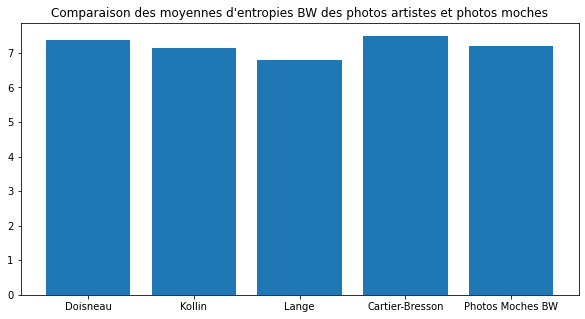

In [11]:
yes = [7.38,7.15,6.78,7.49,7.2]
exes =['Doisneau', 'Kollin', 'Lange', 'Cartier-Bresson', 'Photos Moches BW']

plt.rcParams["figure.figsize"] = (10,5)
plt.bar(exes, yes)
plt.title('Comparaison des moyennes d\'entropies BW des photos artistes et photos moches')
plt.show()
